# <center>Deep Learning</center> 

Mount your Google drive by using this code snippet

In [0]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In this exercise, we will build a neural network model from scratch that is able to distinguish dogs from cats. 

**NOTE:** The 2200 images used in this exercise are excerpted from the ["Dogs vs. Cats"](https://www.kaggle.com/c/dogs-vs-cats/data) dataset available on Kaggle, which contains 25,000 images. We use a subset of the full dataset here.


#### 1.1 Load dataset
 

In [0]:
from keras.preprocessing.image import ImageDataGenerator

img_height, img_width = 128, 128

train_data_dir = '/content/drive/My Drive/CS568-DeepLearning-(Spring2020)/dataset/dogs-vs-cats/train/'
validation_data_dir = '/content/drive/My Drive/CS568-DeepLearning-(Spring2020)/dataset/dogs-vs-cats/val/' 
test_data_dir = '/content/drive/My Drive/CS568-DeepLearning-(Spring2020)/dataset/dogs-vs-cats/'

# normalize the pixel values from [0, 255] to [0, 1] interval
datagen = ImageDataGenerator(rescale=1./255)

# automagically retrieve images and their classes for train and validation sets
batch_size = 32 # e.g 4, 8, 16, 32, 64

train_generator = datagen.flow_from_directory(
        train_data_dir,
        target_size=(img_width, img_height),
        color_mode = 'grayscale',
        batch_size=batch_size,
        class_mode='binary')

validation_generator = datagen.flow_from_directory(
        validation_data_dir,
        target_size=(img_width, img_height),
        color_mode = 'grayscale',
        batch_size=batch_size,
        class_mode='binary')

test_generator = datagen.flow_from_directory(
        test_data_dir,
        target_size=(img_width, img_height),
        color_mode = 'grayscale',
        classes = ['test'],
        class_mode=None)

Found 2067 images belonging to 2 classes.
Found 217 images belonging to 2 classes.
Found 100 images belonging to 1 classes.


In [0]:
from keras.models import Sequential
from keras import layers
from keras.layers import Dropout, Flatten, Dense
from keras.optimizers import SGD

img_width, img_height = 128, 128
input_dim = 128*128
output_dim = 1

def lr():
    # initialize model
    model = Sequential()
    # flatten or vectorize input layer images
    model.add(Flatten(input_shape=(img_height,img_width,1)))
    # add an input layer and output layer with activation function
    model.add(Dense(output_dim, input_dim=input_dim, activation='sigmoid'))   
    return model

# define model
model = lr()
# define optimizer
sgd = SGD(lr=0.001)
model.compile(optimizer=sgd, loss='mse', metrics=['accuracy'])
# print model information
model.summary()


nb_epoch = 100
nb_train_samples = 2000
nb_validation_samples = 200

import time
start = time.time()
model_info = model.fit_generator(
        train_generator,
        samples_per_epoch=nb_train_samples,
        nb_epoch=nb_epoch,
        validation_data=validation_generator,
        nb_val_samples=nb_validation_samples)
end = time.time()
print("Model took %0.2f seconds to train"%(end - start))

Model: "sequential_7"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten_7 (Flatten)          (None, 16384)             0         
_________________________________________________________________
dense_11 (Dense)             (None, 1)                 16385     
Total params: 16,385
Trainable params: 16,385
Non-trainable params: 0
_________________________________________________________________
Epoch 1/100


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:39: UserWarning: The semantics of the Keras 2 argument `steps_per_epoch` is not the same as the Keras 1 argument `samples_per_epoch`. `steps_per_epoch` is the number of batches to draw from the generator at each epoch. Basically steps_per_epoch = samples_per_epoch/batch_size. Similarly `nb_val_samples`->`validation_steps` and `val_samples`->`steps` arguments have changed. Update your method calls accordingly.
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:39: UserWarning: Update your `fit_generator` call to the Keras 2 API: `fit_generator(<keras_pre..., validation_data=<keras_pre..., steps_per_epoch=62, epochs=100, validation_steps=200)`


62/62 [==============================] - 36s 583ms/step - loss: 0.2576 - acc: 0.5065 - val_loss: 0.2536 - val_acc: 0.5064
Epoch 2/100
62/62 [==============================] - 36s 585ms/step - loss: 0.2529 - acc: 0.5177 - val_loss: 0.2520 - val_acc: 0.5296
Epoch 3/100
62/62 [==============================] - 36s 585ms/step - loss: 0.2510 - acc: 0.5261 - val_loss: 0.2540 - val_acc: 0.5164
Epoch 4/100
62/62 [==============================] - 36s 580ms/step - loss: 0.2492 - acc: 0.5325 - val_loss: 0.2514 - val_acc: 0.5148
Epoch 5/100
62/62 [==============================] - 36s 579ms/step - loss: 0.2473 - acc: 0.5434 - val_loss: 0.2501 - val_acc: 0.5625
Epoch 6/100
62/62 [==============================] - 36s 585ms/step - loss: 0.2442 - acc: 0.5638 - val_loss: 0.2497 - val_acc: 0.5585
Epoch 7/100
62/62 [==============================] - 36s 579ms/step - loss: 0.2466 - acc: 0.5621 - val_loss: 0.2511 - val_acc: 0.5567
Epoch 8/100
62/62 [==============================] - 36s 574ms/step - loss

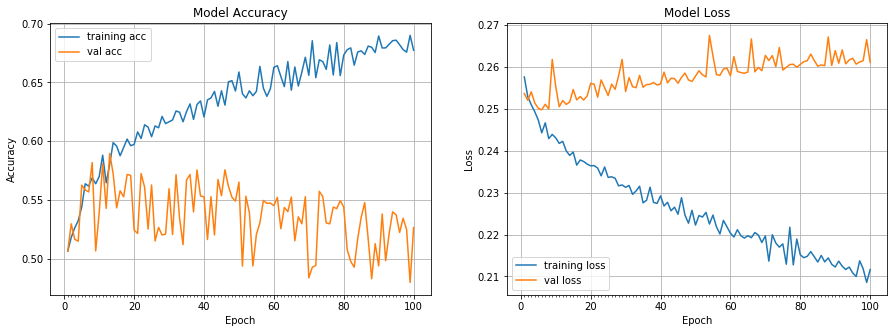

In [0]:
import matplotlib.pyplot as plt
import numpy as np

def plot_model_history(model_history):
    fig, axs = plt.subplots(1,2,figsize=(15,5))
    # model history for accuracy
    axs[0].plot(range(1,len(model_history.history['acc'])+1),model_history.history['acc'])
    axs[0].plot(range(1,len(model_history.history['val_acc'])+1),model_history.history['val_acc'])
    axs[0].set_title('Model Accuracy')
    axs[0].set_ylabel('Accuracy')
    axs[0].set_xlabel('Epoch')
    axs[0].set_xticks(np.arange(1,len(model_history.history['acc'])+1),len(model_history.history['acc'])/10)
    axs[0].legend(['training acc', 'val acc'], loc='best')
    axs[0].grid(True)
    # model history for loss
    axs[1].plot(range(1,len(model_history.history['loss'])+1),model_history.history['loss'])
    axs[1].plot(range(1,len(model_history.history['val_loss'])+1),model_history.history['val_loss'])
    axs[1].set_title('Model Loss')
    axs[1].set_ylabel('Loss')
    axs[1].set_xlabel('Epoch')
    axs[1].set_xticks(np.arange(1,len(model_history.history['loss'])+1),len(model_history.history['loss'])/10)
    axs[1].legend(['training loss', 'val loss'], loc='best')
    axs[1].grid(True)
    plt.show()
plot_model_history(model_info)